In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('milknew.csv')

In [3]:
# Первые 5 строк датасета
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
# Размер датасета - 1059 строк, 8 колонок
dataset.shape

(1059, 8)

In [5]:
dataset.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in dataset.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = dataset[dataset[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

pH - 0
Temprature - 0
Taste - 0
Odor - 0
Fat  - 0
Turbidity - 0
Colour - 0
Grade - 0


In [7]:
# Основные статистические характеристки набора данных
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([[  6.6,  35. ,   1. , ...,   1. ,   0. , 254. ],
       [  6.6,  36. ,   0. , ...,   0. ,   1. , 253. ],
       [  8.5,  70. ,   1. , ...,   1. ,   1. , 246. ],
       ...,
       [  3. ,  40. ,   1. , ...,   1. ,   1. , 255. ],
       [  6.8,  43. ,   1. , ...,   1. ,   0. , 250. ],
       [  8.6,  55. ,   0. , ...,   1. ,   1. , 255. ]])

In [10]:
y

array(['high', 'high', 'low', ..., 'low', 'high', 'low'], dtype=object)

In [11]:
# 1.Формирование обучающей и тестовой выборки
milk_X_train, milk_X_test, milk_y_train, milk_y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [12]:
# 2.Первичное обучение модели и оценка качества
cl1_1 = KNeighborsClassifier(n_neighbors=20)
cl1_1.fit(milk_X_train, milk_y_train)
target1_0 = cl1_1.predict(milk_X_train)
target1_1 = cl1_1.predict(milk_X_test)
accuracy_score(milk_y_train, target1_0), accuracy_score(milk_y_test, target1_1)

(0.9527744982290437, 0.9386792452830188)

In [13]:
# 3.Оценка качества модели с использованием кросс-валидации
# cv=LeaveOneOut()
scores = cross_val_score(KNeighborsClassifier(n_neighbors=20), 
                         X, y, 
                         cv=LeaveOneOut())
scores, np.mean(scores)

(array([0., 1., 1., ..., 1., 1., 1.]), 0.9584513692162417)

In [14]:
# cv=5
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors=20), 
                         X, y, 
                         cv=5)
scores2, np.mean(scores2)

(array([0.94811321, 0.94811321, 0.95283019, 0.97169811, 0.94312796]),
 0.952776535813288)

In [15]:
# 4.Подбор гиперпараметров на основе решетчатого поиска и кросс-валидации
n_range = np.array(range(5,40,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35])}]

In [16]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs.fit(X, y)

Wall time: 26.4 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35])}],
             scoring='accuracy')

In [17]:
clf_gs.best_params_

{'n_neighbors': 5}

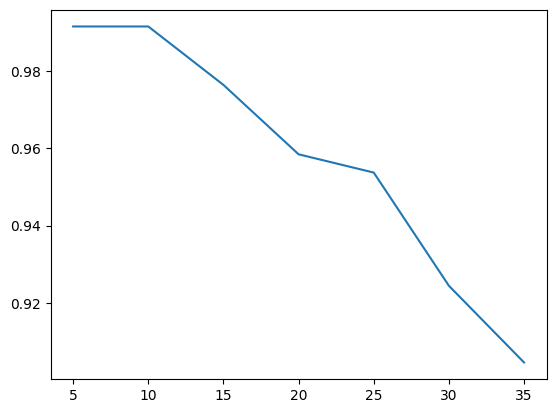

In [18]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [19]:
# Проверим n от 1 до 6
n_range2 = np.array(range(1,7,1))
tuned_parameters2 = [{'n_neighbors': n_range2}]
tuned_parameters2

[{'n_neighbors': array([1, 2, 3, 4, 5, 6])}]

In [20]:
%%time
clf_gs2 = GridSearchCV(KNeighborsClassifier(), tuned_parameters2, cv=LeaveOneOut(), scoring='accuracy')
clf_gs2.fit(X, y)

Wall time: 22.9 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6])}],
             scoring='accuracy')

In [21]:
clf_gs2.best_params_

{'n_neighbors': 1}

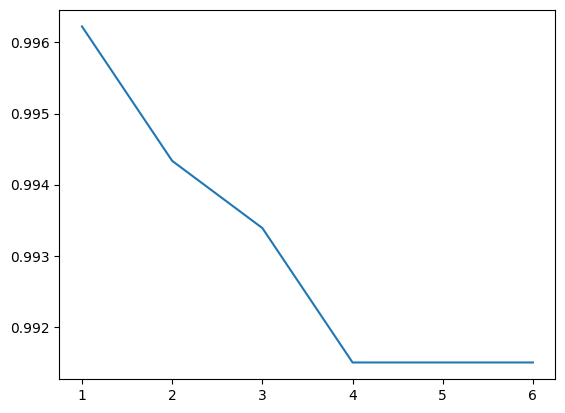

In [22]:
plt.plot(n_range2, clf_gs2.cv_results_['mean_test_score'])

In [23]:
%%time
# Возьмем cv = 5, а не cv = LOO()
clf_gs3 = GridSearchCV(KNeighborsClassifier(), tuned_parameters2, cv=5, scoring='accuracy')
clf_gs3.fit(X, y)

Wall time: 263 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6])}],
             scoring='accuracy')

In [24]:
clf_gs3.best_params_

{'n_neighbors': 1}

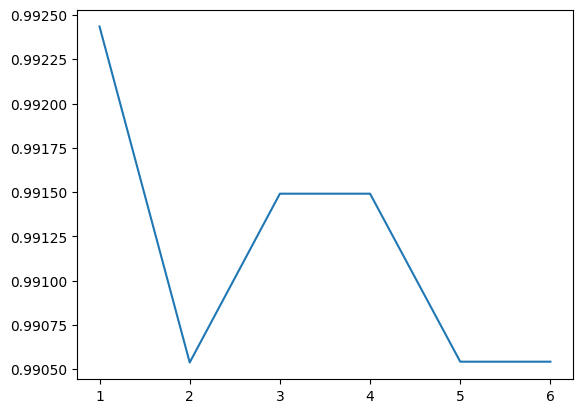

In [25]:
plt.plot(n_range2, clf_gs3.cv_results_['mean_test_score'])

In [26]:
# 5.Обучение модели и оценка качества с учетом подобранных гиперпараметров
clf_gs2.best_estimator_.fit(milk_X_train, milk_y_train)
target2_0 = clf_gs2.best_estimator_.predict(milk_X_train)
target2_1 = clf_gs2.best_estimator_.predict(milk_X_test)

In [27]:
# Новое качество модели
accuracy_score(milk_y_train, target2_0), accuracy_score(milk_y_test, target2_1)

(1.0, 0.9905660377358491)

In [28]:
# Качество модели до подбора гиперпараметров
accuracy_score(milk_y_train, target1_0), accuracy_score(milk_y_test, target1_1)

(0.9527744982290437, 0.9386792452830188)

In [29]:
# Качество для cv = 5
clf_gs3.best_estimator_.fit(milk_X_train, milk_y_train)
target3_0 = clf_gs3.best_estimator_.predict(milk_X_train)
target3_1 = clf_gs3.best_estimator_.predict(milk_X_test)
accuracy_score(milk_y_train, target3_0), accuracy_score(milk_y_test, target3_1)

(1.0, 0.9905660377358491)

In [30]:
# 6.Построение кривых обучения и валидации
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\PycharmProjects\\OAD_NIRS\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

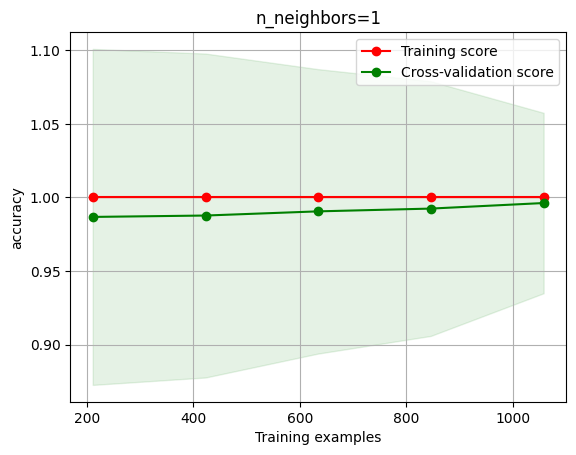

In [31]:
plot_learning_curve(clf_gs2.best_estimator_, 'n_neighbors=1', 
                    X, y, cv=LeaveOneOut(), train_sizes=np.linspace(.2, 1.0, 5))

In [32]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [33]:
n_range3 = np.array(range(1, 100, 10))

<module 'matplotlib.pyplot' from 'C:\\PycharmProjects\\OAD_NIRS\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

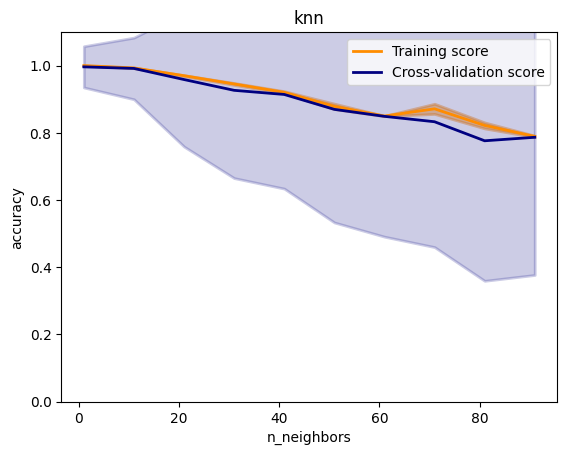

In [34]:
plot_validation_curve(clf_gs2.best_estimator_, 'knn', 
                      X, y, 
                      param_name='n_neighbors', param_range=n_range3, 
                      cv=LeaveOneOut(), scoring="accuracy")